## Fashion MNIST classification

In [1]:
import os, sys, imp

import keras

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D
imp.reload(D)

import utils as U
imp.reload(U)

import plot_lib as pl
imp.reload(pl)

import numpy as np
import datetime

from timeit import default_timer as timer

pl.set_default()

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_33974/1785701380.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import os, sys, imp


In [2]:
# Constants
MODELDIR = "models"
BATCH_SIZE = 32
EPOCHS = 20

### Load and preprocess images

In [3]:
(X_train, y_train), (X_test, y_test) = D.load_fashion_mnist_data()
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

In [17]:
[n_train, d1, d2] = X_train.shape
x_train = np.reshape(X_train, (n_train, d1*d2)) 

n_test = X_test.shape[0]
x_test = np.reshape(X_test, (n_test, d1*d2))

nc = len(np.unique(y_train)) # number of classes
print(f"num classes: {nc}")

num classes: 10


### Visualize images

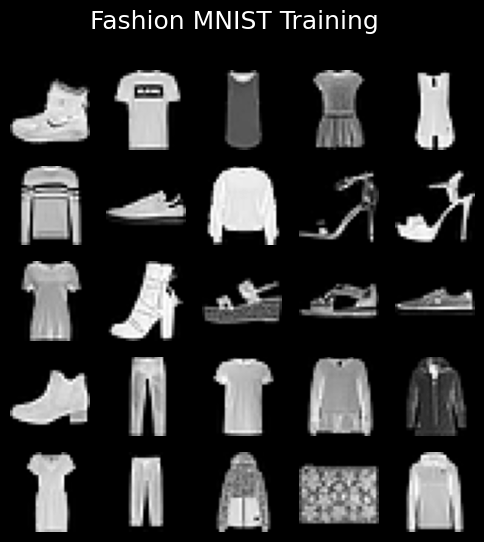

In [18]:
# Visualize training samples
U.visualize_dataset(X_train, title="Fashion MNIST Training", n_samples=25)

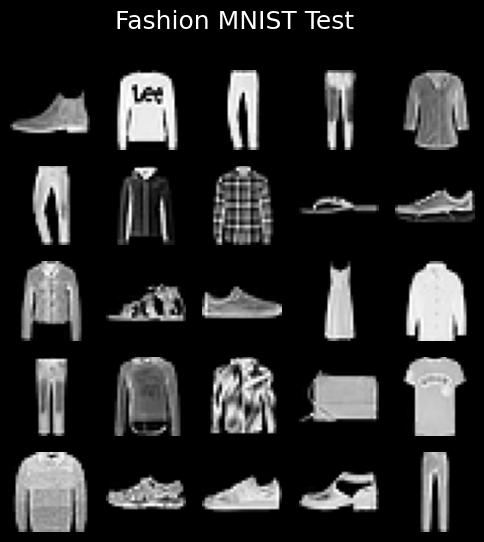

In [6]:
# Visualize test samples
U.visualize_dataset(X_test, title="Fashion MNIST Test", n_samples=25)

### Train ConvNet

Model: "fashion_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


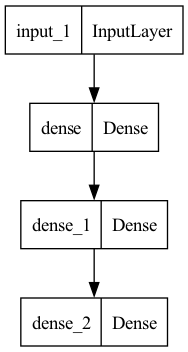

In [7]:
input_shape = (d1*d2,)
inputs = keras.Input(shape=input_shape)
x = keras.layers.Dense(256, activation="relu")(inputs)
x = keras.layers.Dense(128, activation="relu")(x)
outputs = keras.layers.Dense(nc)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mlp")
model.summary()

keras.utils.plot_model(model)

In [8]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.legacy.Adam(learning_rate=1e-4)
accuracy = keras.metrics.SparseCategoricalAccuracy()

In [9]:
# Define callbacks: Tensorboard, Model Checkpoint, Timing
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="./logs/mlp-fashion/" + current_time,
    update_freq="epoch"
)

checkpoint_dir = os.path.join(MODELDIR, f"mlp-fashion-{current_time}")

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir, "weights-{epoch:02d}-{val_loss:.2f}.hdf5")
modelcp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True
)

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

timing_callback = TimingCallback()

In [10]:
# Compile model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=[accuracy],
)

In [11]:
# Train model
history = model.fit(
    x=x_train,
    y=y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback, modelcp_callback, timing_callback]
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5424 - sparse_categorical_accuracy: 0.8158 - val_loss: 0.4524 - val_sparse_categorical_accuracy: 0.8427
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.4203 - val_sparse_categorical_accuracy: 0.8492
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3488 - sparse_categorical_accuracy: 0.8752 - val_loss: 0.3921 - val_sparse_categorical_accuracy: 0.8574
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8689
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3020 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.3521 - val_sparse_categorical_accuracy: 0.8721
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2846 - spars

In [12]:
# print(timing_callback.logs)
print(f"Elapsed time: {sum(timing_callback.logs):.4f} seconds")

Elapsed time: 71.2537 seconds


In [13]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [14]:
history.history["val_sparse_categorical_accuracy"]

[0.8427000045776367,
 0.8492000102996826,
 0.8574000000953674,
 0.8689000010490417,
 0.8720999956130981,
 0.8691999912261963,
 0.8751000165939331,
 0.8787999749183655,
 0.8880000114440918,
 0.8884999752044678,
 0.8776999711990356,
 0.8899000287055969,
 0.8934999704360962,
 0.8899000287055969,
 0.8847000002861023,
 0.8932999968528748,
 0.8873000144958496,
 0.8913000226020813,
 0.8945000171661377,
 0.8920999765396118]

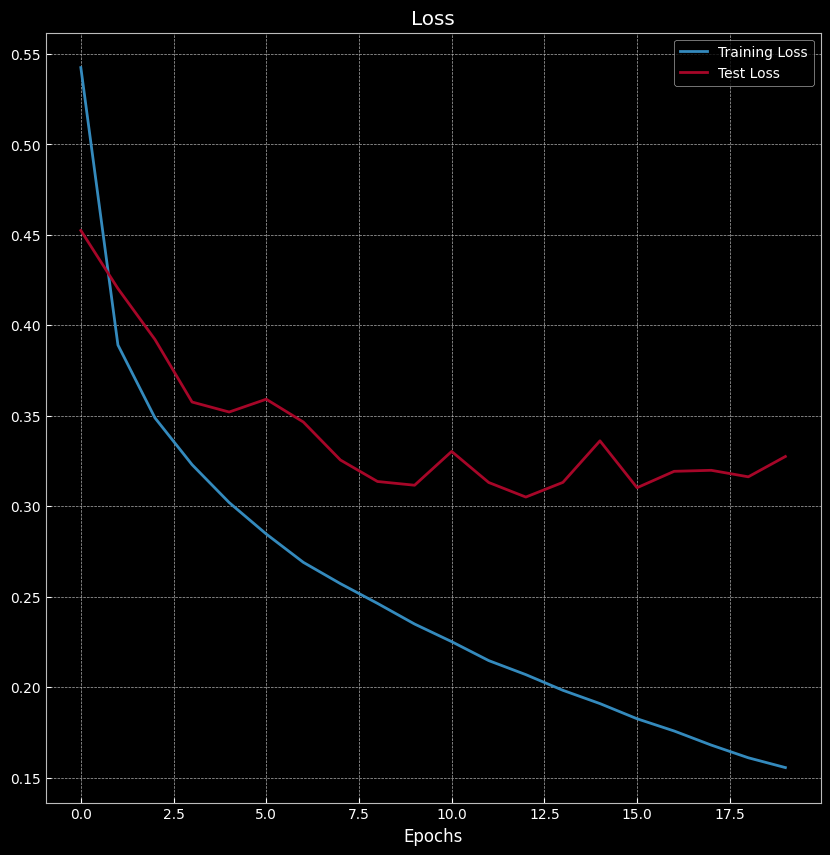

In [15]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
pl.plot_results(
    train_loss,
    test_loss,
    xlabel="Epochs",
    legend=["Training Loss", "Test Loss"],
    title="Loss"
)

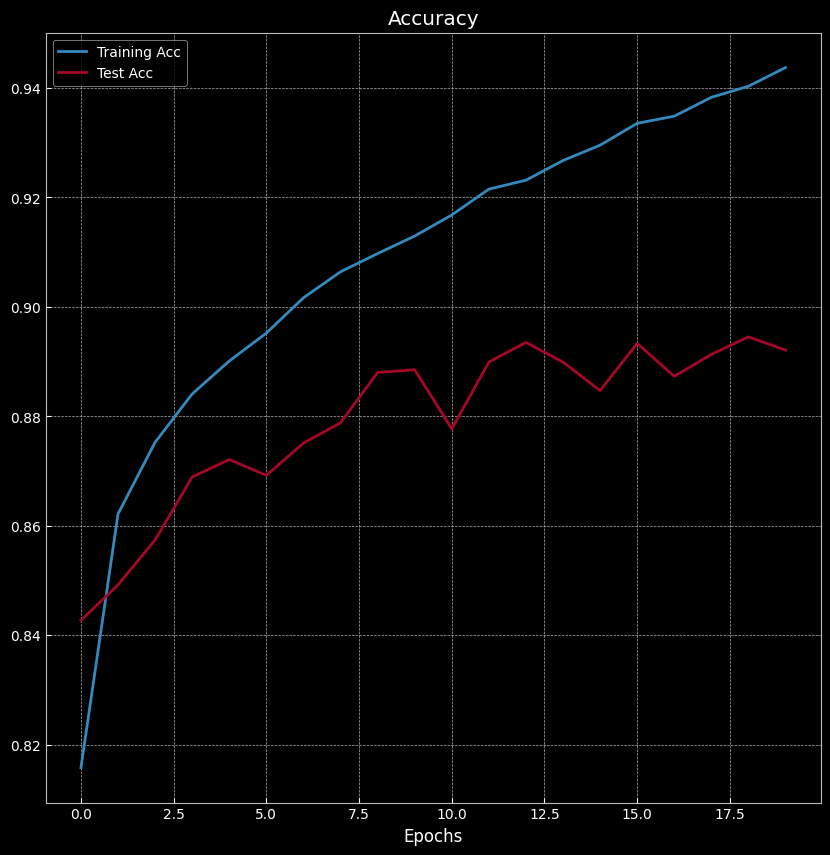

In [16]:
train_acc = history.history["sparse_categorical_accuracy"]
test_acc = history.history["val_sparse_categorical_accuracy"]

pl.plot_results(
    train_acc,
    test_acc,
    xlabel="Epochs",
    legend=["Training Acc", "Test Acc"],
    title="Accuracy"
)